# Agregacion de datos por categoria

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [ ]:
gender = ["Male", "Female"]
income = ["Poor", "Middle class", "Rich"]

In [5]:
n = 500
gender_data = [np.random.choice(gender) for i in range (0,n)]
income_data = [np.random.choice(income) for i in range (0,n)]


In [6]:
gender_data[:10]

['Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female']

In [9]:
# Z -> N(0,1)
# N(m,s) -> m + s * Z 
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25  * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)

In [11]:
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": income
    }
)

In [13]:
data.head()

,Gender,Economic status,Height,Weight,Age,Income
0,Male,Poor,174.438254,46.157300,21.942468,15261.114610
1,Male,Rich,206.373174,57.767355,6.486679,17056.712279
2,Male,Rich,130.236789,24.461983,29.667932,17992.181796
3,Female,Middle class,121.755305,62.195253,50.232335,19795.405271
4,Female,Rich,208.297957,71.034980,27.733907,12445.827529


In [16]:
data["Age"].astype(int)[:4]

0    21
1     6
2    29
3    50
Name: Age, dtype: int64

In [17]:
dummy_age = data["Age"].astype(int)

In [28]:
data = pd.concat((data, dummy_age),axis=1)
data[:4]

,Gender,Economic status,Height,Weight,Income,Age
0,Male,Poor,174.438254,46.157300,15261.114610,21
1,Male,Rich,206.373174,57.767355,17056.712279,6
2,Male,Rich,130.236789,24.461983,17992.181796,29
3,Female,Middle class,121.755305,62.195253,19795.405271,50


# Agrupacion

In [31]:
group_gender = data.groupby("Gender")

In [35]:
group_gender.groups['Female'].tolist

<bound method IndexOpsMixin.tolist of Int64Index([  3,   4,   5,   6,   8,   9,  11,  13,  14,  15,
            ...
            467, 476, 477, 478, 480, 482, 492, 495, 497, 498],
           dtype='int64', length=253)>

In [36]:
dir()

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__inv__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmul__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__unicode__',
 '__weakref__',
 '__xor__',
 '_accessors',
 '_add_comparison_methods',
 '_add_logical_methods',
 '_add_logical_methods_disabl

In [38]:
group_gender.groups['Female'].values

array([  3,   4,   5,   6,   8,   9,  11,  13,  14,  15,  20,  23,  24,
        25,  28,  29,  31,  32,  34,  35,  38,  39,  42,  44,  45,  46,
        48,  50,  52,  53,  54,  55,  60,  61,  67,  68,  69,  76,  77,
        78,  79,  80,  83,  85,  87,  88,  91,  94,  95,  96,  97,  98,
        99, 100, 101, 103, 104, 108, 109, 111, 113, 115, 117, 119, 120,
       124, 126, 128, 130, 132, 135, 137, 139, 143, 144, 146, 148, 150,
       151, 152, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165,
       167, 170, 173, 174, 176, 178, 180, 182, 184, 188, 189, 193, 194,
       196, 198, 199, 200, 201, 203, 204, 212, 215, 216, 217, 218, 219,
       223, 224, 225, 226, 227, 229, 231, 233, 235, 236, 240, 241, 242,
       243, 249, 250, 253, 254, 255, 260, 262, 265, 270, 272, 273, 274,
       276, 277, 279, 280, 281, 282, 283, 285, 287, 288, 289, 290, 292,
       293, 295, 301, 303, 305, 307, 310, 311, 313, 314, 317, 319, 323,
       325, 326, 327, 328, 329, 330, 333, 335, 336, 338, 339, 34

In [77]:
group_gender.get_group("Female")[0:4]

,Gender,Economic status,Height,Weight,Income,Age
3,Female,Middle class,121.755305,62.195253,19795.405271,50
4,Female,Rich,208.297957,71.034980,12445.827529,27
5,Female,Middle class,179.528293,74.151716,18414.178095,22
6,Female,Poor,114.660592,62.517148,20090.273144,30


In [78]:
double_groups = data.groupby(["Gender", "Economic status"])

In [79]:
len(double_groups)

6

In [81]:
double_groups.mean()

Height     Weight        Income        Age
Gender Economic status                                                
Female Middle class     165.046745  66.746393  18486.494098  30.433735
       Poor             160.076644  62.059415  17222.115351  29.739130
       Rich             160.408633  65.031172  17730.937855  28.615385
Male   Middle class     163.670877  67.388228  18678.072877  30.185714
       Poor             159.851525  65.629796  17033.323377  28.702128
       Rich             169.426684  62.033367  18136.036795  27.662651

In [83]:
double_groups.size()

Gender  Economic status
Female  Middle class       83
        Poor               92
        Rich               78
Male    Middle class       70
        Poor               94
        Rich               83
dtype: int64

In [84]:
double_groups.describe()

Age                                                 \
                       count       mean        std   min    25%   50%   75%   
Gender Economic status                                                        
Female Middle class     83.0  30.433735  12.660860   2.0  22.50  30.0  41.5   
       Poor             92.0  29.739130  13.118957 -15.0  22.00  30.0  38.0   
       Rich             78.0  28.615385  12.367984   4.0  20.00  29.0  36.0   
Male   Middle class     70.0  30.185714  12.533194  -2.0  23.25  31.0  38.0   
       Poor             94.0  28.702128  12.181274   0.0  19.00  31.0  37.0   
       Rich             83.0  27.662651  13.046144   1.0  18.00  26.0  38.0   

                             Height                 ...            Income  \
                         max  count        mean     ...               75%   
Gender Economic status                              ...                     
Female Middle class     53.0   83.0  165.046745     ...      21542.139839   
       Poor             63.0   92.0  160.076644     ...      19787.730197   
       Rich             64.0   78.0  160.408633     ...      20455.876732   
Male   Middle class     57.0   70.0  163.670877     ...      21109.040896   
       Poor             57.0   94.0  159.851525     ...      19222.575802   
       Rich             67.0   83.0  169.426684     ...      20879.879853   

                                     Weight                                   \
                                 max  count       mean        std        min   
Gender Economic status                                                         
Female Middle class     25250.718228   83.0  66.746393  22.475684  20.322960   
       Poor             24651.426137   92.0  62.059415  22.601314   3.340766   
       Rich             25754.928181   78.0  65.031172  24.465223  -0.261450   
Male   Middle class     25994.196161   70.0  67.388228  26.085257   3.331034   
       Poor             28928.351866   94.0  65.629796  26.878437 -21.503679   
       Rich             27466.970958   83.0  62.033367  25.013064 -24.534184   

                                                                     
                              25%        50%        75%         max  
Gender Economic status                                               
Female Middle class     46.582680  65.531399  82.123943  115.917330  
       Poor             47.190110  60.604965  80.231411  125.726812  
       Rich             47.256548  65.001675  81.706564  114.867128  
Male   Middle class     46.636434  69.367387  86.720643  121.366371  
       Poor             48.266943  67.911881  81.672928  117.694963  
       Rich             43.661452  61.881678  78.440144  114.719213  

[6 rows x 32 columns]

In [86]:
double_groups["Income"].describe()

count          mean          std           min  \
Gender Economic status                                                   
Female Middle class      83.0  18486.494098  3706.886025   8298.968385   
       Poor              92.0  17222.115351  3487.417843   5183.679537   
       Rich              78.0  17730.937855  3555.931939   6010.548947   
Male   Middle class      70.0  18678.072877  3422.534157  12239.480784   
       Poor              94.0  17033.323377  3702.293365   8642.874416   
       Rich              83.0  18136.036795  3767.167423   9946.696452   

                                 25%           50%           75%           max  
Gender Economic status                                                          
Female Middle class     15526.223935  18589.595186  21542.139839  25250.718228  
       Poor             15276.186612  16839.906099  19787.730197  24651.426137  
       Rich             15572.616711  17086.885330  20455.876732  25754.928181  
Male   Middle class     16123.486157  18429.620555  21109.040896  25994.196161  
       Poor             14792.158111  16967.713978  19222.575802  28928.351866  
       Rich             15567.719879  17953.726719  20879.879853  27466.970958

In [87]:
double_groups["Income"].size()

Gender  Economic status
Female  Middle class       83
        Poor               92
        Rich               78
Male    Middle class       70
        Poor               94
        Rich               83
Name: Income, dtype: int64

In [88]:
double_groups.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height": np.std
    }
)

Income        Age     Height
Gender Economic status                                    
Female Middle class     1.534379e+06  30.433735  31.840192
       Poor             1.584435e+06  29.739130  32.681658
       Rich             1.383013e+06  28.615385  27.635930
Male   Middle class     1.307465e+06  30.185714  30.302401
       Poor             1.601132e+06  28.702128  33.020838
       Rich             1.505291e+06  27.662651  27.881449

In [92]:
test = double_groups.aggregate(
    {
       
        "Age" : lambda x : np.mean(x) > 29 ,
        "Height": np.std
    }
)

In [99]:
test[(test["Age"] == True)]

Age     Height
Gender Economic status                 
Female Middle class     True  31.840192
       Poor             True  32.681658
Male   Middle class     True  30.302401

In [100]:
double_groups.aggregate([np.sum,np.mean])

Height                   Weight             \
                                 sum        mean          sum       mean   
Gender Economic status                                                     
Female Middle class     13698.879811  165.046745  5539.950627  66.746393   
       Poor             14727.051221  160.076644  5709.466208  62.059415   
       Rich             12511.873363  160.408633  5072.431384  65.031172   
Male   Middle class     11456.961377  163.670877  4717.175987  67.388228   
       Poor             15026.043307  159.851525  6169.200807  65.629796   
       Rich             14062.414770  169.426684  5148.769426  62.033367   

                              Income                 Age             
                                 sum          mean   sum       mean  
Gender Economic status                                               
Female Middle class     1.534379e+06  18486.494098  2526  30.433735  
       Poor             1.584435e+06  17222.115351  2736  29.739130  
       Rich             1.383013e+06  17730.937855  2232  28.615385  
Male   Middle class     1.307465e+06  18678.072877  2113  30.185714  
       Poor             1.601132e+06  17033.323377  2698  28.702128  
       Rich             1.505291e+06  18136.036795  2296  27.662651

# Filtrado

In [109]:
double_groups["Age"].filter(lambda x:x.sum() >= 5000)

Series([], Name: Age, dtype: int64)

# Transformacion 

In [110]:
zscore = lambda x : (x-x.mean())/x.std()

In [111]:
z_group = double_groups.transform(zscore)

In [113]:
z_group[:4]


,Height,Weight,Income,Age
0,0.441743,-0.724465,-0.478679,-0.632292
1,1.325128,-0.170551,-0.286508,-1.660464
2,-1.405590,-1.502070,-0.038187,0.102509
3,-1.359648,-0.202492,0.353103,1.545414


In [114]:
double_groups.nth(2)

Age      Height        Income     Weight
Gender Economic status                                          
Female Middle class      22  179.528293  18414.178095  74.151716
       Poor              20  129.833599  24651.426137  57.342248
       Rich              23  116.156525  21935.846232  67.097783
Male   Middle class      40  126.021718  22350.198423  41.209372
       Poor              37  159.528606  15563.365652  96.548818
       Rich              29  130.236789  17992.181796  24.461983

In [122]:
double_groups

In [124]:
group_gender.get_group("Female")[0:4]

,Gender,Economic status,Height,Weight,Income,Age
3,Female,Middle class,121.755305,62.195253,19795.405271,50
4,Female,Rich,208.297957,71.034980,12445.827529,27
5,Female,Middle class,179.528293,74.151716,18414.178095,22
6,Female,Poor,114.660592,62.517148,20090.273144,30


In [125]:
data[0:4]

,Gender,Economic status,Height,Weight,Income,Age
0,Male,Poor,174.438254,46.157300,15261.114610,21
1,Male,Rich,206.373174,57.767355,17056.712279,6
2,Male,Rich,130.236789,24.461983,17992.181796,29
3,Female,Middle class,121.755305,62.195253,19795.405271,50


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mainPath = "/home/user/projectAnacoda/python-course-ml/python-ml-course/datasets/"

In [51]:
data = pd.read_csv(mainPath + '/customer-churn-model/Customer Churn Model.txt')

In [7]:
len(data)

3333

## Dividir en forma normal

In [14]:
a = np.random.randn(len(data))

In [24]:
 %matplotlib inline

(array([  8.,  24., 151., 413., 741., 852., 703., 323.,  99.,  19.]),
 array([-3.61047135, -2.93473422, -2.25899708, -1.58325994, -0.9075228 ,
        -0.23178567,  0.44395147,  1.11968861,  1.79542574,  2.47116288,
         3.14690002]),
 <a list of 10 Patch objects>)

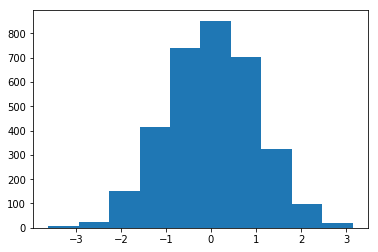

In [25]:
plt.hist(a)

In [31]:
len(a)

3333

In [39]:
check = (a < 0.8)

In [41]:
check

array([ True, False,  True, ...,  True, False,  True])

In [52]:
training = data[check]

In [55]:
testing = data[~check]

In [56]:
len(testing)

717

# Libreria sklearn

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
train, test = train_test_split(data, test_size=0.2)

In [60]:
len(train)

2666

## Usuando funcion shuffle

In [63]:
import sklearn

In [66]:
dataShuffle = sklearn.utils.shuffle(data)

In [85]:
cut_id = int(0.75*len(dataShuffle))
train_data = dataShuffle[:cut_id]
test_data = dataShuffle[cut_id+1:]

In [86]:
len(train_data)

2499

In [87]:
len(test_data)

833